In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

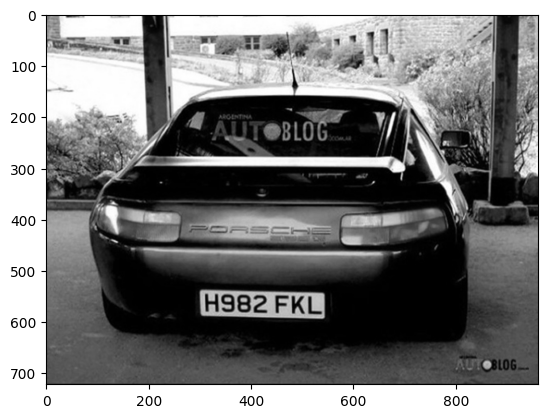

In [2]:
img = cv2.imread('Assets/image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

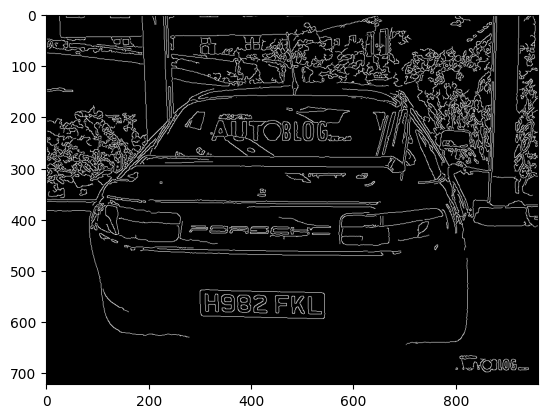

In [3]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter for noise reduction
bilateral_filtered_image = cv2.bilateralFilter(grayscale_image, 11, 17, 17)

# Perform edge detection using Canny
edged_image = cv2.Canny(bilateral_filtered_image, 30, 200)

# Display the edge-detected image
plt.imshow(cv2.cvtColor(edged_image, cv2.COLOR_BGR2RGB))

In [4]:
import imutils

# Find contours in the edge-detected image
keypoints = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Extract contours from the keypoints
contours = imutils.grab_contours(keypoints)

# Sort the contours by area in descending order and keep the top 10
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [5]:
"""Now we need to loop through the contours and analyse if they represent a square or a number plate"""
#set up a temp variable
location = None 

for contour in contours:
    #used to approximate the polygon from the comtour,used the check how dense the contour is.
    #returns the 4 co-ordinates of the number plate in the image
    approx = cv2.approxPolyDP(contour, 10, True) 

    #if a contour has 4 points then it is potentially our number plate.
    if len(approx) == 4: 
        location = approx 
        break

In [6]:
location 

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

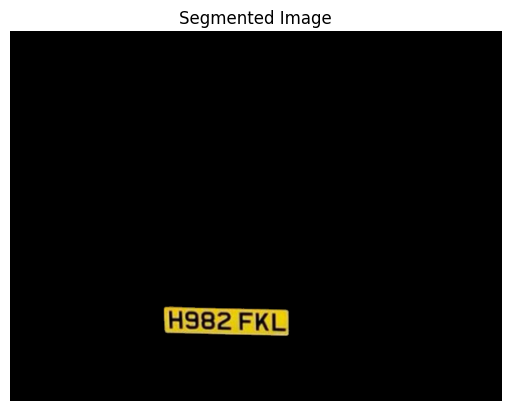

In [7]:
import numpy as np

# Assume the number plate is detected in one of these contours
# Here we are using the first contour as the location of the number plate for demonstration
location = contours[0]

# Create a mask of the same shape as the grayscale image, filled with zeros (uint8)
mask = np.zeros(grayscale_image.shape, np.uint8)

# Draw the contour on the mask
cv2.drawContours(mask, [location], 0, 255, -1)

# Use bitwise_and to extract the segment of the image that represents the number plate
segmented_image = cv2.bitwise_and(img, img, mask=mask)

# Display the segmented image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')  # Hide axes
plt.show()


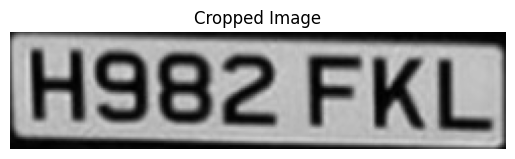

In [8]:
# Get coordinates for cropping the image
x, y, w, h = cv2.boundingRect(location)
cropped_image = grayscale_image[y:y + h, x:x + w]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')  # Hide axes
plt.show()


In [9]:
import easyocr

# Instantiate a reader method and pass it through the language English 'en'
reader = easyocr.Reader(['en'])

# Use the read text method
result = reader.readtext(cropped_image)
result


[([[0, 0], [245, 0], [245, 58], [0, 58]], 'H982FKL', 0.9904259934818903)]

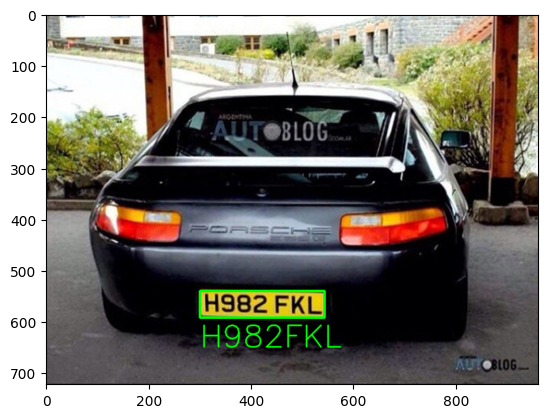

In [10]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=2, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))